# **UTS Machine Learning : Heart Attack Dataset Using Random Forest Classification**

Name         : Ilham Muhamad Firdaus     
Studen ID    : 1103202001     
Model Name   : Random Forest  
Dataset      : [Heart Attack](https://www.kaggle.com/datasets/bharath011/heart-disease-classification-dataset)

#### **Apa Itu Random Forest Classification**

Random Forest adalah algoritma dalam machine learning yang digunakan untuk pengklasifikasian dataset dalam jumlah besar. Karena fungsinya bisa digunakan untuk banyak dimensi dengan berbagai skala dan performa yang tinggi.

> Keunggulan : 
>1. Algoritma yang fleksibel dan mudah digunakan, tanpa menggunakan banyak parameter.
>2. Algoritmanya digunakan untuk kumpulan data yang berukuran besar. 
>3. Mengurangi masalah overfitting.     
ㅤ
ㅤ

⬇️ **Mengimport library yang dibutuhkan untuk proses Classification**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

⬇️ **Membuat kode untuk import dan membuka dataset dari device**

In [2]:
# Memanggil dan menampilkan data
dataset = "HeartAttack.csv"
df = pd.read_csv(dataset)

# Menampilkan data
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


>Output ini adalah beberapa awal dari dataset yang kita siapkan, dimana disini menampilkan kolom age, gender, impluse, pressurehight, pressurelow, glucose, kcm, troponin, class. 

### **Exploratory Data Analysis (EDA)**

Exploration Data Analysis (EDA) adalah proses di mana pengguna melihat dan memahami data dengan menggunakan metode statistik dan algoritma machine learning. Tujuannya yaitu untuk menemukan pola dan korelasi dalam data dan mempersiapkan data untuk analisis yang lebih lanjut.    
ㅤ

⬇️ **Membuat code untuk menampilkan informasi data dari dataset**

In [3]:
# Menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


>Output ini adalah informasi dari dataset, dimana dataset memiliki 1319 baris dan 9 kolom. Dan menunjukkan tipe data untuk setiap kolom (float64, int64 dan object).

⬇️ **Membuat code untuk menampilkan statistik deskriptif dari dataset**

In [4]:
# Ringkasan statistik deskriptif
df.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.188779,0.659591,75.997726,127.169067,72.242608,146.715466,15.276095,0.360200
std,13.610727,0.474027,15.295496,26.124850,14.008083,74.997918,46.326590,1.154465
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.660000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,170.000000,5.805000,0.085000
max,103.000000,1.000000,135.000000,223.000000,154.000000,541.000000,300.000000,10.300000


>Count adalah Jumlah entri yang tidak hilang untuk setiap kolom.  
Mean: Rata-rata atau nilai tengah dari data.    
Std (Standard Deviation) adalah Deviasi standar, mengukur sejauh mana nilai-nilai tersebar dari rata-rata.    
Min (Minimum) adalah Nilai terkecil dalam kolom.  
25% (Percentile 25th) adalah Nilai yang membagi 25% data terendah.    
50% (Percentile 50th) adalah Median atau nilai tengah, membagi data menjadi dua bagian yang sama. 
75% (Percentile 75th) adalah Nilai yang membagi 75% data terendah.    
Max (Maximum) adalah Nilai terbesar dalam kolom.  

### **Data Visualization**

Data visualization adalah proses melihat dan memahami data dengan menggunakan grafik dan diagram. Data visualization sangat penting karena dapat membantu pengguna melihat dan memahami data yang kompleks dan sulit dipahami secara langsung.

⬇️ **Membuat code untuk menampilkan visual data dengan diagram batang dari dataset**

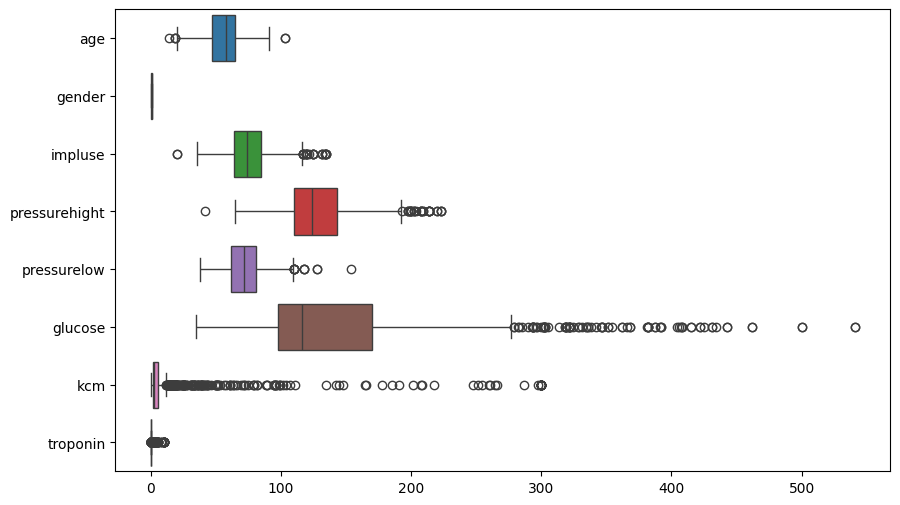

In [5]:
# Menampilkan data secara visual
plt.figure(figsize=(10,6))
sns.boxplot(data=df, orient="h");

>Output ini merupakan visual data yang menampilkan data dengan diagram batang dari setiap kolom.

⬇️ **Membuat code untuk menampilkan visual data dengan heatmap dari dataset dan mengubah kolom "class" menjadi "heart_attack"**

<Axes: >

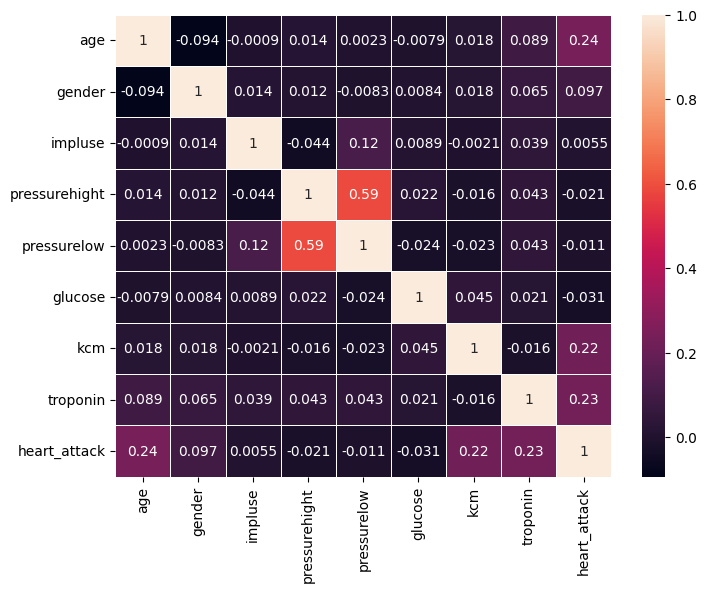

In [6]:
# Mengubah nilai 'positive' menjadi 1 dan 'negative' menjadi 0
df['class'] = df['class'].replace({'positive': 1, 'negative': 0})

# Mengubah nama kolom 'class' menjadi 'heart_attack'
df = df.rename(columns={'class': 'heart_attack'})

# Membuat heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, linewidths=0.5)

>Output ini merupakan visual data yang menampilkan data dengan heatmap dimana indikator heatmap dari 0 - 1. Dan mengubah kolom "class" menjadi "heart_attack".

⬇️ **Membuat data visual dari hubungan banyaknya yang positif heart attack dengan gender**

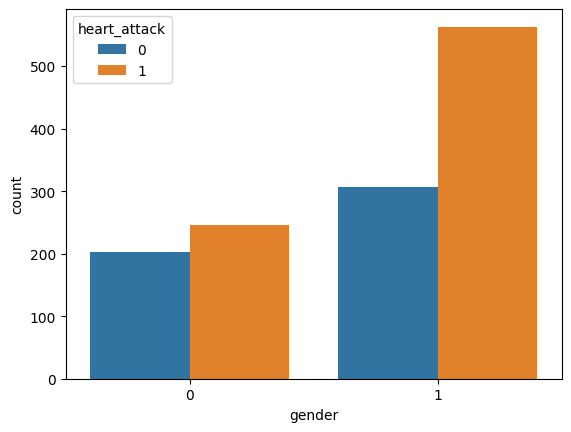

In [7]:
# Jika gender (0 untuk female) dan (1 untuk male)
sns.countplot(data=df, x="gender", hue= "heart_attack");

>Output ini merupakan visual data yang menampilkan data dengan diagram batang dari hubungan gender dan banyaknya orang yang mengidap heart attack. Dimana gender laki-laki lebih banyak daripada gender perempuan.

⬇️ **Membuat data visual dari hubungan banyaknya yang positif heart attack dengan umur**

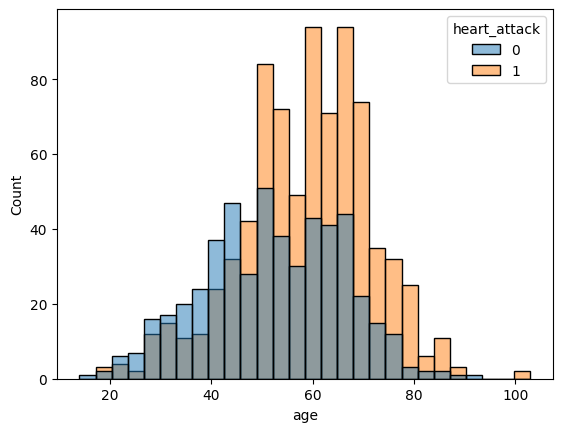

In [8]:
# Membuat data visual dari hubungan banyaknya yang positif heart attack dengan umur
sns.histplot(data=df, x="age", hue="heart_attack");

>Output ini merupakan visual data yang menampilkan data dengan diagram batang dari hubungan umur dan banyaknya orang yang mengidap heart attack. Dimana rata-rata umur yang mengidap heart attack adalah 60 tahun

### **Training Model**

Training data adalah data yang digunakan untuk mengajarkan algoritma atau model mesin untuk membuat prediksi atau melakukan tugas yang diinginkan. 

⬇️ **Mengimport library yang dibutuhkan untuk proses Training**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

⬇️ **Membuat code untuk memisahkan dataset menjadi fitur (X) dan (y). Serta membagi dataset untuk train set dan test set**

In [10]:
# Memisahkan dataset menjadi (X) dan (y)
X = df.drop("heart_attack", axis=1)
y = df["heart_attack"]

# Membagi dataset untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8)

⬇️ **Membuat code untuk proses scaling dalam proses pra-pemrosesan data**

In [11]:
# Metode penskalaan yang umum
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

⬇️ **Membuat code untuk proses inisialisasi model Random Forest**

In [12]:
# Menginisialisasi model Random Forest.
rfc = RandomForestClassifier()

param_grid_rfc = {"n_estimators":[50, 72, 100, 128], "max_features":[2,3,4,5], 
                "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 4, 9]}

⬇️ **Membuat code untuk mengevaluasi beberapa kombinasi parameter**

In [13]:
# Fitting data
grid_rfc = GridSearchCV(rfc, param_grid_rfc)
grid_rfc.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 4, 9],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 72, 100, 128]})

>Output ini adalah deskripsi dari objek GridSearchCV, yang menunjukkan model (RandomForestClassifier) yang digunakan sebagai estimator, parameter-parameter yang akan ditelusuri untuk mencari yang terbaik, serta model default sebelum dilakukan tuning parameter.

### **Evaluating**

Evaluasi data membantu untuk memahami seberapa baik model Random Forest yang telah dilatih berhasil memprediksi kelas-kelas pada dataset uji.

⬇️ **Membuat code untuk memprediksi hasil dari proses training**

In [14]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

preds_rfc = grid_rfc.predict(X_test)
def model_metrics(preds, grid_model):
    print(f"Best Parameters: {grid_model.best_params_}\n")
    print(f"Accuracy score: {accuracy_score(y_test, preds)}\n")
    print(f"Classification report:\n{classification_report(y_test, preds)}\n")
    feat_importacne = grid_model.best_estimator_.feature_importances_
    feat_importance = pd.DataFrame(index=X.columns, data=feat_importacne, columns=["Importance"])
    print(f"Feature importance:\n{feat_importance.sort_values(ascending=False, by='Importance')}\n")
    print("Confiusion Matrix:")
    ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test)

⬇️ **Membuat code untuk evaluasi yang akan memberikan informasi tentang performa model Random Forest terhadap data training**

Best Parameters: {'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 72}

Accuracy score: 0.9848484848484849

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       137
           1       0.98      0.99      0.99       193

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330


Feature importance:
               Importance
troponin         0.622146
kcm              0.324282
age              0.017253
glucose          0.010226
gender           0.010090
pressurehight    0.008476
impluse          0.004621
pressurelow      0.002906

Confiusion Matrix:


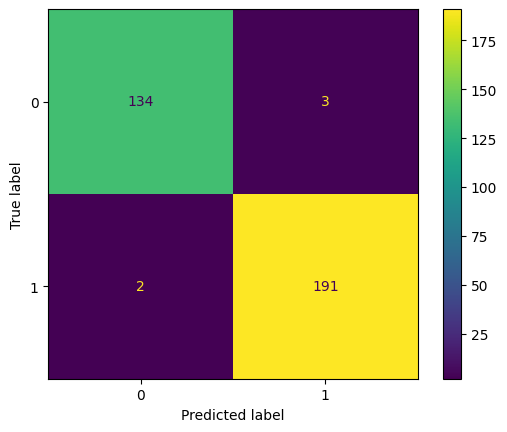

In [15]:
model_metrics(preds_rfc, grid_rfc)

>Output itu merupakan hasil dari evaluasi model Random Forest setelah dilakukan proses training parameter dan prediksi terhadap data uji.
>Best Parameters : 
>1. max_features: 5
>2. min_samples_leaf: 1
>3. min_samples_split: 2
>4. n_estimators: 50
>
>Accuracy Score : *98.79%*.
>   